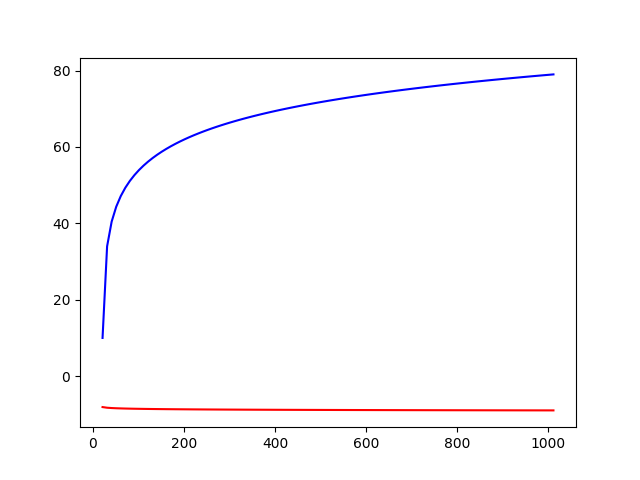

In [ ]:
'''
A small thing I've been messing around with.
A model tries to fit itself into a function of the form a*ln(x+b) + c
Right now it is assumed that b <= 0 in order not to land in a land of pain.

It seems to be on the right track, though it takes some time. If the initial values don't cause it to skyrocket into oblivion, then it tends to fit pretty well.
As the time goes by, it fits better and better. After a lot of time, mind you. I discovered it after letting it run while I went to make me some tea.
To my surprise, when I got back the blue line was entirely covered by the red one.

After that, it does it's thing, which I didn't bother to test properly yet. The derivative with respect to b in the model probably skyrockets after getting close to "true b".
And yeah, the implementation is pretty lackluster right now. Don't judge me. You've done that too.

Feel flee to play around with the paramaters A, B, C in order to break this abomination even further. Values in range ~( -50, 50 ) with B negative, seem to be more or less stable.

SIDENOTE: the animation shows training cycle of just one model. Which is why you might wanna run it again if the model buggers off to infinity.
Not a good look, I know
'''

'''
This line supposedly ensures that the animation works in my enviroment, which is vscode.
It was literally slapped here after a chaotic googling session, and noticing that it actually does what it's supposed to.
You might wanna adjust it to Your enviroment. How? No idea. Be strong. 
'''
%matplotlib widget


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


class Model:
    def __init__(self, X):
        self.a = np.random.uniform( -10, 10 )
        self.b = np.random.uniform(-np.min( X ), 0)
        self.c = np.random.uniform( -10, 10 )
    
    def forward(self, X):
        #oblivion gate
        return self.a * np.log( X + self.b ) + self.c

    def backward(self, _X, _Y, _Yhat, lr):
        #possible critical point due to !/x

        X = _X
        Y = _Y
        Yhat = _Yhat
        
        #db =  (-2) * np.mean( np.sum( np.multiply((Y - Yhat), (self.a/(X + self.b))  ) ) )
        #MARGIN = 0.000000000001
        # if db > 1/MARGIN:
        #     #cutoff X,
        #     db = 1/lr
        #     idx = 0
        #     for i in range( X.size ):
        #         if X[i] > -self.b + MARGIN:
        #             idx = i
        #             break
        #     X = X[i:]
        #     Y = Y[i:]
        #     Yhat = Yhat[i:]

        terms1 = Y - Yhat
        terms2 = np.log( X + self.b )
        da = (-2) * np.mean( np.multiply( terms1, terms2 ))
        dc = (-2) * np.mean( terms1 )

        import math
        self.a = self.a - lr * da 
        # if db > 1/MARGIN:
        #     self.b = self.b - lr * db
        # else:
        #     self.b = self.b - math.sqrt(lr) * db
        self.c = self.c - lr * dc
            
        
    def update(self, X, Y, lr):
        Yhat = self.forward( X )
        self.backward( X, Y, Yhat, lr )


EPOCHS = 10000
LR = 0.001


#YOU CAN TWEAK THESE
A = 10
B = -20 # assumptions require B to the <= 0
C = 10

#ensure Xs are bigger than 0
X = np.arange( -B+1, 1000-B, step=10, dtype=float )
Y = A * np.log( X + B ) + C

model = Model( X )

fig, ax = plt.subplots()

og = ax.plot( X, Y, color='blue')[0]
fn = ax.plot( X, model.forward(X), color='red' )[0]

def update( frame ):
    model.update( X, Y, LR )
    fn.set_ydata( model.forward(X) )

plt.show()
ani = FuncAnimation( fig, update, frames=1 )




